In [ ]:
import pandas as pd
import itertools
import  ternary
import matplotlib.pyplot as plt

This file is used to merge the data that was obtained by the batchruns. Since we split the batchruns into two different "sets", so that not all the repetitions had to be done by a single computer, we have the data in two seperate files. However, you should adjust the path to correct folder for your own purposes.

In [ ]:
# Define the possible values
values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


combinations = []

# Iterate over possible values of a, b, c in increments of 0.1
for a in range(0, 11):  # This corresponds to 0 to 1 in steps of 0.1
    for b in range(0, 11):  # This corresponds to 0 to 1 in steps of 0.1
        for c in range(0, 11):  # This corresponds to 0 to 1 in steps of 0.1
            if a + b + c == 10:  # We check if the sum is 10 (which corresponds to 1.0 in the original scale)
                combinations.append((a / 10, b / 10, c / 10))  # Convert back to original scale

In [ ]:
# we want to have all the titles to be able to merge the files
titles = []
repetitions = 15
n_step = 500
col_names = ["w_sim", "w_prox", "w_pop", "repeat", "avg clustering coeff", "modularity"]
df_merged = pd.DataFrame(columns=col_names)

col_names2 = ["w_sim", "w_prox", "w_pop", "avg clustering coeff", "modularity"]
df_averaged = pd.DataFrame(index=range(len(combinations)), columns=col_names2)

for j in range(repetitions):
    for i in range(len(combinations)):
        a = combinations[i][0]
        b = combinations[i][1]
        c = combinations[i][2]
        title =(f"pop{a}prox{b}sim{c}_repeat{j + 1}.csv")
        df = pd.read_csv(f"simulation_results\{title}")
        df_merged.loc[i] = df.loc[n_step]
        df_merged.iat[i, 3] = j + 1 # repeat
        df_merged.iat[i, 0] = b # wsim
        df_merged.iat[i, 1] = c # wprox
        df_merged.iat[i, 2] = a # wpop

for j in range(repetitions):
    for i in range(len(combinations)):
        a = combinations[i][0] #wpop
        b = combinations[i][1] #wsim
        c = combinations[i][2] #wprox
        title =(f"pop{a}prox{b}sim{c}_repeat{j + 1}.csv")
        df = pd.read_csv(f"simulation_results2\{title}")
        df_merged.loc[i] = df.loc[n_step]
        df_merged.iat[i, 3] = j + 16 # repeat
        df_merged.iat[i, 0] = b # wsim
        df_merged.iat[i, 1] = c # wprox
        df_merged.iat[i, 2] = a # wpop

for i in range(len(combinations)):
    w_pop = float(combinations[i][0])
    w_prox = float(combinations[i][1])
    w_sim = float(combinations[i][2])
    subset = df_merged.loc[(df_merged["w_pop"] == w_pop) & (df_merged["w_prox"] == w_prox) & (df_merged["w_sim"] == w_sim)]
    df_averaged.iat[i, 0] = w_sim
    df_averaged.iat[i, 1] = w_prox
    df_averaged.iat[i, 2] = w_pop
    df_averaged.iat[i, 3] = subset["avg clustering coeff"].mean()
    df_averaged.iat[i, 4] = subset["modularity"].mean()

In [ ]:
# for the ternary plot average clustering coef
heatmap_data = {}
for _, row in df_averaged.iterrows():
    # Convert weights to percentage format (assuming the scale is 100)
    w_pop, w_prox, w_sim = row['w_pop']*10, row['w_prox']*10, row['w_sim']*10
    avg_clustering_coeff = row['avg clustering coeff']
    heatmap_data[(w_pop, w_prox, w_sim)] = avg_clustering_coeff


# Create the ternary plot
scale = 10
figure, tax = ternary.figure(scale=scale)

# Draw the heatmap
tax.heatmap(heatmap_data, style="hexagonal", cmap='viridis', colorbar=True)

# Draw boundary and gridlines
tax.boundary(linewidth=0, scale=10)
tax.gridlines(color="black", multiple=10)

# Set axis labels
fontsize = 10
offset = 0.15
tax.left_axis_label("w_pop", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_prox", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_sim", fontsize=fontsize, offset=offset)
tax.ticks(axis='lbr', ticks=values, multiple=4, linewidth=0.1, tick_formats="%.2f", offset=0.02)

# Set title
plt.title('Average Clustering Coefficient Heatmap on Ternary Plot', fontsize=10)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Show the plot
plt.show()


In [ ]:
# for the ternary plot average clustering coef
heatmap_data = {}
for _, row in df_averaged.iterrows():
    # Convert weights to percentage format (assuming the scale is 100)
    w_pop, w_prox, w_sim = row['w_pop']*10, row['w_prox']*10, row['w_sim']*10
    avg_clustering_coeff = row['modularity']
    heatmap_data[(w_pop, w_prox, w_sim)] = avg_clustering_coeff


# Create the ternary plot
scale = 10
figure, tax = ternary.figure(scale=scale)

# Draw the heatmap
tax.heatmap(heatmap_data, style="hexagonal", cmap='viridis', colorbar=True)

# Draw boundary and gridlines
tax.boundary(linewidth=0, scale=10)
tax.gridlines(color="black", multiple=10)

# Set axis labels
fontsize = 10
offset = 0.15
tax.left_axis_label("w_pop", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_prox", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_sim", fontsize=fontsize, offset=offset)
tax.ticks(axis='lbr', ticks=values, multiple=4, linewidth=0.1, tick_formats="%.2f", offset=0.02)

# Set title
plt.title('Modularity Heatmap on Ternary Plot', fontsize=10)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Show the plot
plt.show()


In [39]:
# looking into the opinion values
col_names3 = ["w_sim", "w_prox", "w_pop", "opinions", "n_clusters"]
df_opinions = pd.DataFrame(index=range(len(combinations)), columns=col_names3)

for i in range(len(combinations)):
    a = combinations[i][0] #wpop
    b = combinations[i][1] #wsim
    c = combinations[i][2] #wprox
    title =(f"pop{a}prox{b}sim{c}_opinions_repeat{2}.csv")
    data_opinions = pd.read_csv(f"simulation_results\{title}")
    df_opinions.iat[i, 3] = data_opinions.values
    df_opinions.iat[i, 0] = b # wsim
    df_opinions.iat[i, 1] = c # wprox
    df_opinions.iat[i, 2] = a # wpop
    df_opinions.iat[i, 4] = None

print(df_opinions)
        

   w_sim w_prox w_pop                                           opinions  \
0    0.0    1.0   0.0  [[0.4059354105944684], [0.5020344036126776], [...   
1    0.1    0.9   0.0  [[0.4036677241140428], [0.7570868685902945], [...   
2    0.2    0.8   0.0  [[0.3991030365157872], [0.2479267219319907], [...   
3    0.3    0.7   0.0  [[0.8200900151024421], [0.4384667737975159], [...   
4    0.4    0.6   0.0  [[0.8016952577158891], [0.2405579933333934], [...   
..   ...    ...   ...                                                ...   
61   0.1    0.1   0.8  [[0.2821960412476789], [0.4303074654917154], [...   
62   0.2    0.0   0.8  [[0.3647506886420223], [0.7648569887432917], [...   
63   0.0    0.1   0.9  [[0.7179895034392767], [0.562647408335828], [0...   
64   0.1    0.0   0.9  [[0.3476069908264635], [0.8037929306061874], [...   
65   0.0    0.0   1.0  [[0.6788061221677743], [0.5835289885055315], [...   

   n_clusters  
0        None  
1        None  
2        None  
3        None  
4      

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def find_optimal_clusters(data, max_k=74):
    """
    Find the optimal number of clusters for a dataset using the Elbow Method and Silhouette Score.
    """
    iters = range(2, max_k+1)
    
    sse = []
    silhouettes = []
    
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        sse.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouettes.append(score)
        
    #f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12, 6))
    
    #ax1.plot(iters, sse, '-o')
    #ax1.set_xlabel('Number of Clusters')
    #ax1.set_ylabel('Sum of Squared Distances (SSE)')
    #ax1.set_title('Elbow Method')
    
    #ax2.plot(iters, silhouettes, '-o')
    #ax2.set_xlabel('Number of Clusters')
    #ax2.set_ylabel('Silhouette Score')
    #ax2.set_title('Silhouette Method')
    
    #plt.show()
    
    # Return the number of clusters with the highest silhouette score
    optimal_k = iters[np.argmax(silhouettes)]
    return optimal_k

# Analyzing each run individually
optimal_clusters_per_run = {}

for i in range(df_opinions.shape[0]):
    run_data = np.array(df_opinions.iloc[i]['opinions']).reshape(-1, 1)
    optimal_k = find_optimal_clusters(run_data)
    #optimal_clusters_per_run[f'Run_{i+1}'] = optimal_k

    df_opinions.iat[i, 4] = optimal_k # n clusters

print(df_opinions)


   w_sim w_prox w_pop                                           opinions  \
0    0.0    1.0   0.0  [[0.4059354105944684], [0.5020344036126776], [...   
1    0.1    0.9   0.0  [[0.4036677241140428], [0.7570868685902945], [...   
2    0.2    0.8   0.0  [[0.3991030365157872], [0.2479267219319907], [...   
3    0.3    0.7   0.0  [[0.8200900151024421], [0.4384667737975159], [...   
4    0.4    0.6   0.0  [[0.8016952577158891], [0.2405579933333934], [...   
..   ...    ...   ...                                                ...   
61   0.1    0.1   0.8  [[0.2821960412476789], [0.4303074654917154], [...   
62   0.2    0.0   0.8  [[0.3647506886420223], [0.7648569887432917], [...   
63   0.0    0.1   0.9  [[0.7179895034392767], [0.562647408335828], [0...   
64   0.1    0.0   0.9  [[0.3476069908264635], [0.8037929306061874], [...   
65   0.0    0.0   1.0  [[0.6788061221677743], [0.5835289885055315], [...   

   n_clusters  
0           2  
1           2  
2           2  
3           2  
4      

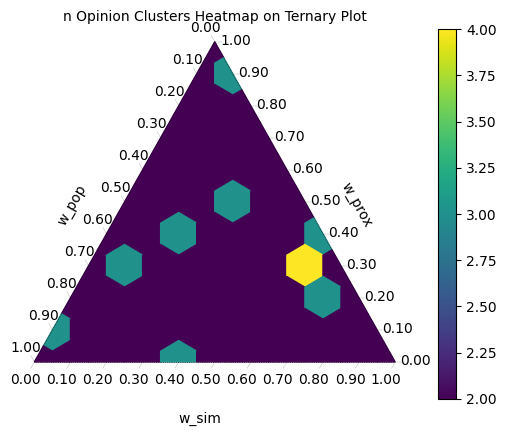

In [41]:
# for the ternary plot average clustering coef
heatmap_data = {}
for _, row in df_opinions.iterrows():
    # Convert weights to percentage format (assuming the scale is 100)
    w_pop, w_prox, w_sim = row['w_pop']*10, row['w_prox']*10, row['w_sim']*10
    n_clusters = row['n_clusters']
    heatmap_data[(w_pop, w_prox, w_sim)] = n_clusters


# Create the ternary plot
scale = 10
figure, tax = ternary.figure(scale=scale)

# Draw the heatmap
tax.heatmap(heatmap_data, style="hexagonal", cmap='viridis', colorbar=True)

# Draw boundary and gridlines
tax.boundary(linewidth=0, scale=10)
tax.gridlines(color="black", multiple=10)

# Set axis labels
fontsize = 10
offset = 0.15
tax.left_axis_label("w_pop", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_prox", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_sim", fontsize=fontsize, offset=offset)
tax.ticks(axis='lbr', ticks=values, multiple=4, linewidth=0.1, tick_formats="%.2f", offset=0.02)

# Set title
plt.title('n Opinion Clusters Heatmap on Ternary Plot', fontsize=10)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Show the plot
plt.show()


TypeError: unsupported format string passed to numpy.ndarray.__format__

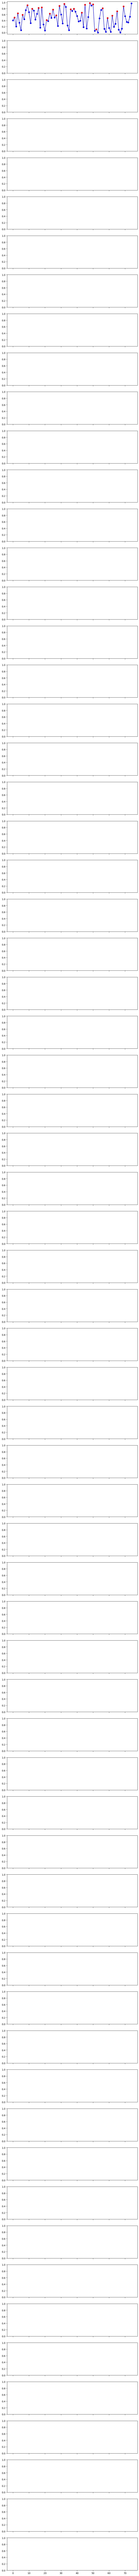

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data creation
np.random.seed(0)
data = df_opinions

# Function to find peaks in a list of numbers
def find_peaks(opinions):
    peaks = []
    deviations = []
    for i in range(1, len(opinions)-1):
        if opinions[i] > opinions[i-1] and opinions[i] > opinions[i+1]:
            peaks.append(i)
            deviations.append(opinions[i] - opinions[i-1])
    return peaks, deviations

# Analyzing each run individually
fig, axs = plt.subplots(len(data), figsize=(10, 3 * len(data)), sharex=True)

for i, row in data.iterrows():
    opinions = row['opinions']
    peaks, deviations = find_peaks(opinions)
    
    # Plot opinions
    axs[i].plot(opinions, label='Opinions', marker='o', linestyle='-', color='b')
    
    # Plot peaks
    axs[i].plot(peaks, [opinions[p] for p in peaks], 'ro', label='Peaks')
    
    # Plot deviations
    for p, dev in zip(peaks, deviations):
        axs[i].annotate(f'Dev: {dev:.2f}', xy=(p, opinions[p]), xytext=(p, opinions[p] + 0.1),
                        arrowprops=dict(facecolor='black', shrink=0.05))
    
    axs[i].set_title(f'Run {row["Run_ID"]}')
    axs[i].legend()
    
plt.xlabel('Time')
plt.ylabel('Opinions')
plt.tight_layout()
plt.show()
